In [4]:
import numpy as np
import pandas as pd

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# Load the data.
dataset = pd.read_csv('../datasets/network-logs.csv')

In [27]:
dataset.head()

,REMOTE_PORT,LATENCY,THROUGHPUT,ANOMALY
0,21,15.942875,16.202998,0
1,20,12.666451,15.899084,1
2,80,13.894550,12.958008,0
3,21,13.620813,15.459475,0
4,21,15.705485,15.339565,0


In [5]:
samples = dataset.iloc[:, [1, 2]].values
targets = dataset['ANOMALY'].values

In [6]:
training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.3, random_state=0)

In [7]:
# k-Nearest Neighbors model
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(training_samples,training_targets)
knc_prediction = knc.predict(testing_samples)
knc_accuracy = 100.0 * accuracy_score(testing_targets, knc_prediction)
print ("K-Nearest Neighbours accuracy: " + str(knc_accuracy))

K-Nearest Neighbours accuracy: 95.90163934426229


In [ ]:
from sklearn.metrics import confusion_matrix


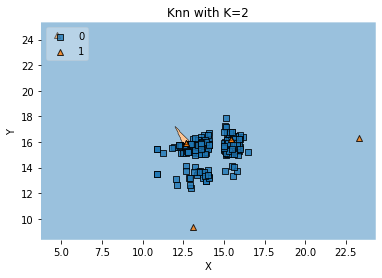

In [19]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(training_samples, training_targets, clf=knc, legend=2)# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K='+ '2')
plt.show()

In [8]:
# Decision tree model
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(training_samples,training_targets)
dtc_prediction = dtc.predict(testing_samples)
dtc_accuracy = 100.0 * accuracy_score(testing_targets, dtc_prediction)
print ("Decision Tree accuracy: " + str(dtc_accuracy))

Decision Tree accuracy: 96.72131147540983


In [20]:
text_representation = export_text(dtc)
print(text_representation)

|--- feature_1 <= 10.89
|   |--- class: 1
|--- feature_1 >  10.89
|   |--- feature_0 <= 7.81
|   |   |--- class: 1
|   |--- feature_0 >  7.81
|   |   |--- feature_0 <= 19.92
|   |   |   |--- feature_1 <= 15.90
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  15.90
|   |   |   |   |--- feature_0 <= 12.88
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  12.88
|   |   |   |   |   |--- feature_0 <= 15.40
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  15.40
|   |   |   |   |   |   |--- feature_0 <= 15.42
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  15.42
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  19.92
|   |   |   |--- class: 1



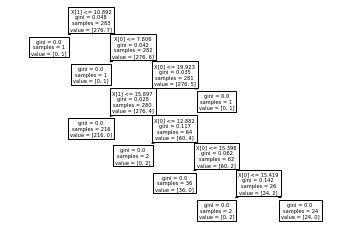

In [26]:
plot_tree(dtc);